## Thesis Committee Meeting 2023

Plots for thesis committee meeting occurring on 10/12/2023.

Slide deck [here](https://docs.google.com/presentation/d/1Vx9YwWmy6KL0cn3JGoF_LBFpD6Y-mM8XUlJoklqIhiM/edit#slide=id.g2888ba23161_0_351)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pathlib
import sys
import pandas as pd

[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]
from get_rat_data import *

from linear_regression import *

sns.set_context("talk")

%load_ext autoreload
%autoreload 2

## Load in

In [2]:
vdf = get_rat_viol_data()
df = get_rat_data()

returning viol dataset for all animals
returning full dataset for all animals


## Violation Plots

Two plots that were requested in lab meeting were (1) violations by delay length and (2) violations over a session.

#### Violations by delay length

In [3]:
vdf

,animal_id,session,trial,s_a,s_b,choice,correct_side,hit,delay,training_stage,violation,n_trial,training_stage_cat
0,W051,1,1,NaN,NaN,1.0,0,0.0,1.00,1,False,0,1
1,W051,2,1,NaN,NaN,1.0,0,0.0,0.01,1,False,1,1
2,W051,2,2,NaN,NaN,0.0,0,1.0,0.01,1,False,2,1
3,W051,2,3,NaN,NaN,0.0,1,0.0,0.01,1,False,3,1
4,W051,2,4,NaN,NaN,1.0,0,0.0,0.01,1,False,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899813,W094,199,213,84.0,76.0,NaN,1,NaN,4.10,4,True,2461733,4
899814,W094,199,214,76.0,68.0,NaN,1,NaN,2.10,4,True,2461734,4
899815,W094,199,215,92.0,84.0,NaN,1,NaN,3.10,4,True,2461735,4
899816,W094,199,216,84.0,76.0,NaN,1,NaN,4.10,4,True,2461736,4


<Axes: xlabel='delay', ylabel='violation'>

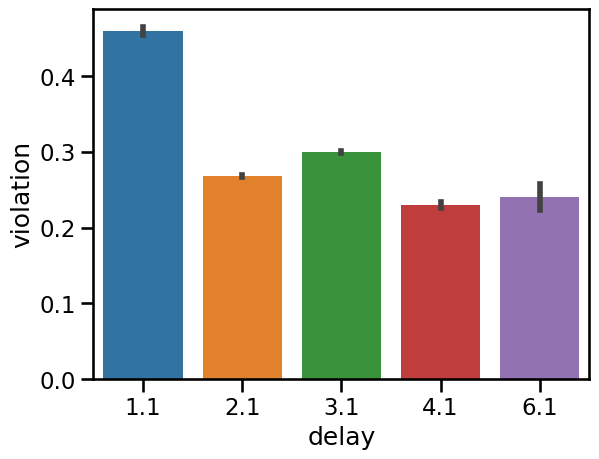

In [4]:
sns.barplot(data=vdf.query("training_stage > 2"), x="delay", y="violation")

<Axes: xlabel='delay', ylabel='violation'>

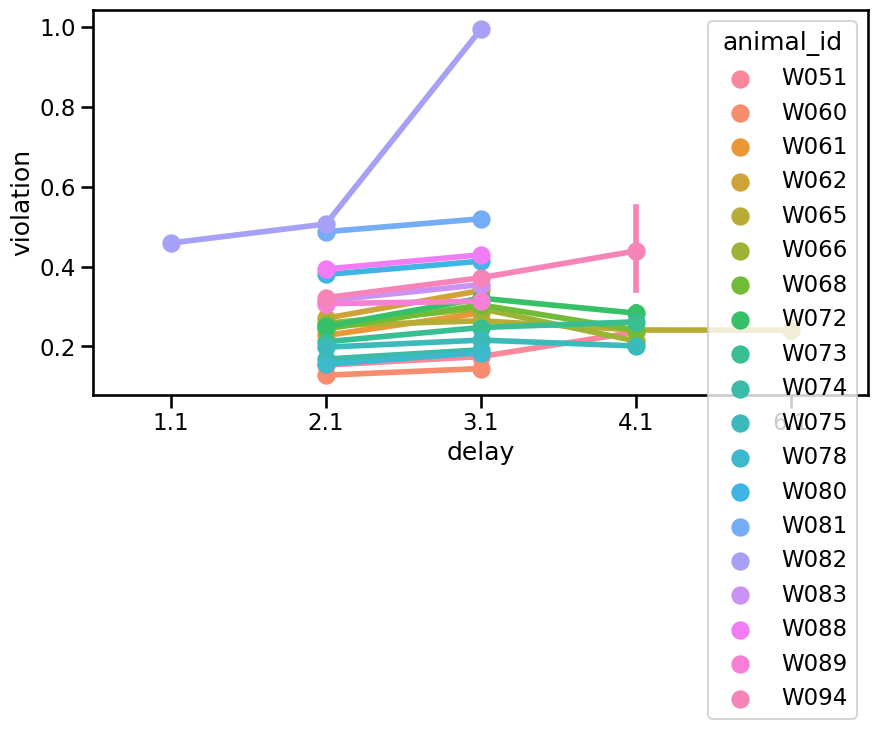

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2"),
    x="delay",
    y="violation",
    hue="animal_id",
)

Looks like delay 1.1 and 6.1 were rarely ever used for these animals, so I will drop them from the plot since I want to compare all the animals against each other.

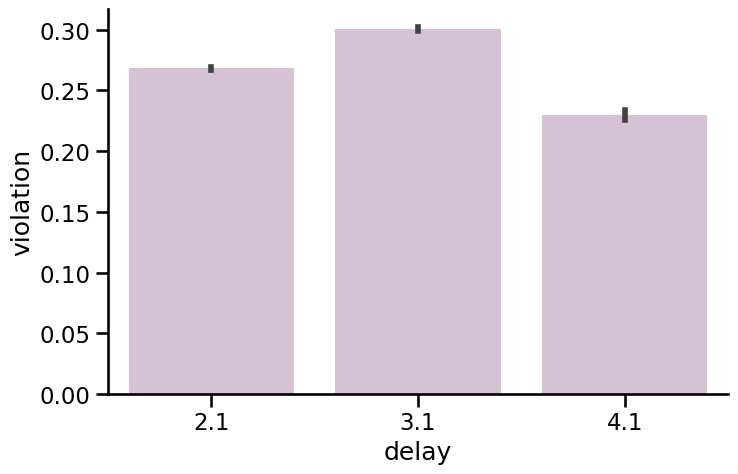

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=vdf.query("training_stage > 2 and delay > 2 and delay < 6"),
    x="delay",
    y="violation",
    color="thistle",
    ax=ax,
)

sns.despine()

> **Summary**: it does not appear that violation differs by delay length. It may be that 4.1 comes later in the task when an animal is more experienced with the structure. An interesting plot to make would be delta between delays on trial t

In [7]:
# Group by animal_id and calculate the delta_delay
vdf["delta_delay"] = vdf.groupby(["animal_id", "session"])["delay"].transform(
    lambda x: x - x.shift(1)
)

vdf.loc[vdf["trial"] == 2, "delta_delay"] = np.nan

In [8]:
vdf.query("training_stage > 2").delay.unique()

array([2.1, 4.1, 3.1, 6.1, 1.1])

In [9]:
vdf["delta_delay"] = vdf.delta_delay.round(2)

In [10]:
vdf.tail(20)

,animal_id,session,trial,s_a,s_b,choice,correct_side,hit,delay,training_stage,violation,n_trial,training_stage_cat,delta_delay
899798,W094,199,198,92.0,84.0,0.0,1,0.0,4.1,4,False,2461718,4,0.0
899799,W094,199,199,84.0,92.0,0.0,0,1.0,4.1,4,False,2461719,4,0.0
899800,W094,199,200,68.0,76.0,0.0,0,1.0,2.1,4,False,2461720,4,-2.0
899801,W094,199,201,60.0,68.0,NaN,0,NaN,2.1,4,True,2461721,4,0.0
899802,W094,199,202,84.0,76.0,0.0,1,0.0,3.1,4,False,2461722,4,1.0
899803,W094,199,203,84.0,76.0,0.0,1,0.0,2.1,4,False,2461723,4,-1.0
899804,W094,199,204,84.0,92.0,1.0,0,0.0,2.1,4,False,2461724,4,0.0
899805,W094,199,205,60.0,68.0,1.0,0,0.0,4.1,4,False,2461725,4,2.0
899806,W094,199,206,60.0,68.0,0.0,0,1.0,3.1,4,False,2461726,4,-1.0
899807,W094,199,207,68.0,60.0,NaN,1,NaN,2.1,4,True,2461727,4,-1.0


[Text(0.5, 0, 'Delta Delay [s]'),
 Text(0, 0.5, 'Violation Rate'),
 Text(0.5, 1.0, '<-- Shorter Delay || Longer Delay -->')]

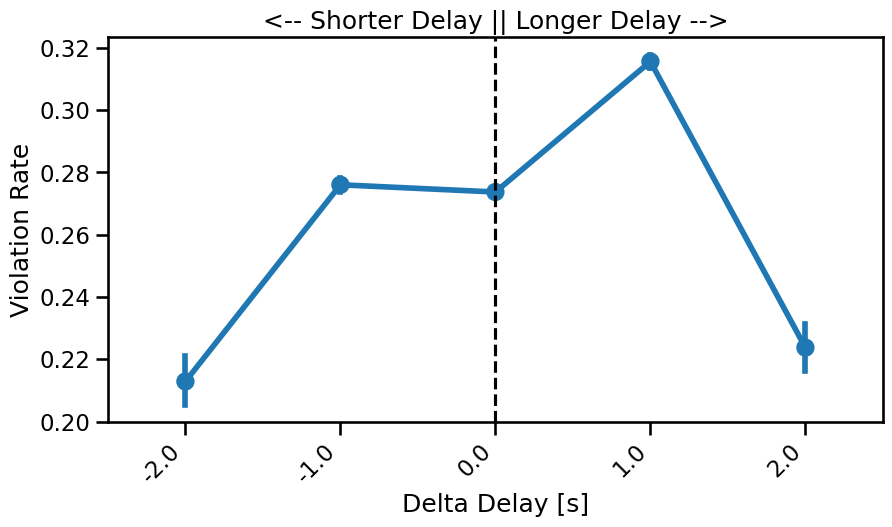

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2 and delta_delay > -3 and delta_delay < 3"),
    x="delta_delay",
    y="violation",
    # hue="animal_id",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.axvline(2, color="k", linestyle="--")

ax.set(
    xlabel=("Delta Delay [s]"),
    ylabel=("Violation Rate"),
    title=("<-- Shorter Delay || Longer Delay -->"),
)

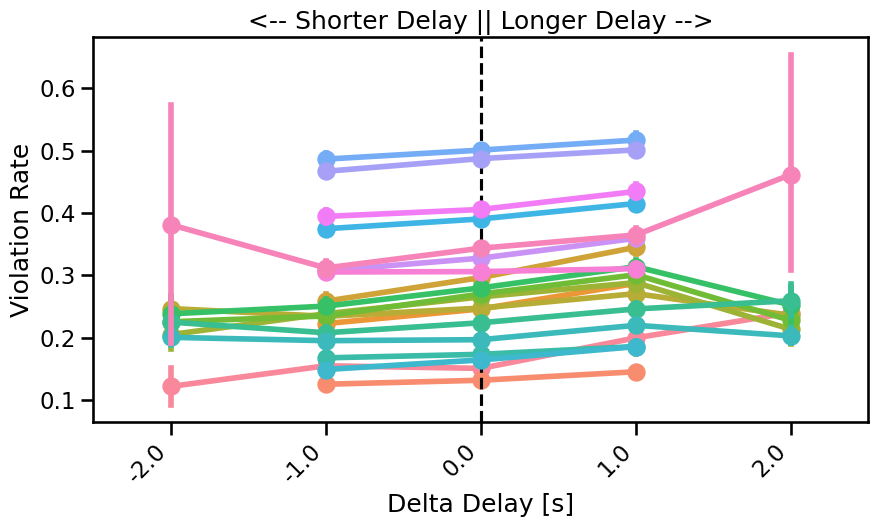

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2 and delta_delay > -3 and delta_delay < 3"),
    x="delta_delay",
    y="violation",
    hue="animal_id",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.axvline(2, color="k", linestyle="--")

ax.set(
    xlabel=("Delta Delay [s]"),
    ylabel=("Violation Rate"),
    title=("<-- Shorter Delay || Longer Delay -->"),
)

# turn of legend
ax.legend().set_visible(False)

[Text(0.5, 0, 'Delta Delay [s]'),
 Text(0, 0.5, 'Violation Rate'),
 Text(0.5, 1.0, '<-- Shorter Delay || Longer Delay -->')]

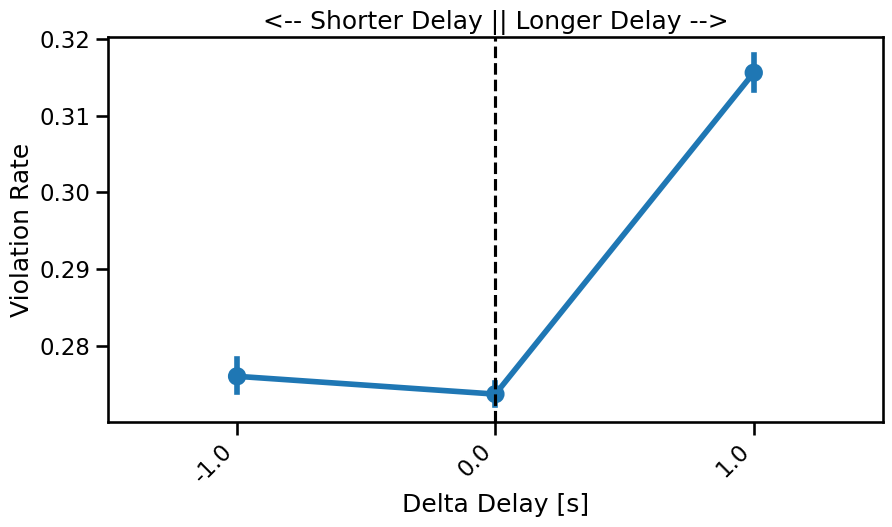

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2 and delta_delay > -2 and delta_delay < 2"),
    x="delta_delay",
    y="violation",
    # hue="animal_id",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.axvline(1, color="k", linestyle="--")

ax.set(
    xlabel=("Delta Delay [s]"),
    ylabel=("Violation Rate"),
    title=("<-- Shorter Delay || Longer Delay -->"),
)

In [14]:
vdf.query(
    "training_stage > 2 and delta_delay > -3 and delta_delay < 3"
).delta_delay.value_counts()

delta_delay
 0.0    370603
-1.0    162351
 1.0    162283
 2.0     10534
-2.0     10465
Name: count, dtype: int64

> **Summary**: There is a slight trend of increase n delay when the delta delay is positive (ie trial t is longer than trial t - 1) when looking a the range [-1, 1]. However, when you add in delta delays of 2 or more (which not all animals have) then the trend is less apparent. This could be a decent regressor to explore, but I am unsure of how much effect it will have since the actual magnitude of the difference is quite small for the [-1,1]range (28% to 32%) and this is only a subset of the data.

### Violations by trial number

I think i need to find the cumulative distribution for a single animal first and then think about expanding across animals.

In [15]:
violation_rate = (
    df.groupby(["animal_id", "session", "trial"])["violation"].mean().reset_index()
)

In [16]:
np.sum(violation_rate != 0)

animal_id    2540006
session      2540006
trial        2540006
violation     256691
dtype: int64

### Linear Regression to Predict Trained Hit Rate

Repeating an analysis i did previously for EDA/lab meeting but with the stage names made more clear and the data from stage 3 and 4 collapsed into a single regressor.

I'll start by xreating the "trained_threshold_df" this df is used to determine at what session an animal becomes trained. In this case we define trained as the last crossing of the 0.70 threshold in the 2 week rolling average hit rate in stage 4. The first and median crossings were also evaluated in the eda notebook.

Then, I will extract information on the final session average hit rate which is the average session performance of an animal once trained. I'll perform a linear regression to assess the weights of the regressors of interest. 

In "motor learning violations" this refers to violations in stage 1 since no sounds are playing. In "rule learning violations" this refers to violations in stage 3 and 4 when the rule is required. Stage 2 is ignored since it only lasts 2 days.



In [17]:
"""
Creating the "trained_threshold_df" this df is used to determine at whhat
session an animal becomes trained. In this case we define trained as the
last crossing of the 0.70 threshold in the 2 week rolling average hit rate
in stage 4. The first and median crossings were also evaluated in the EDA notebook.
"""

"""
session each animal reached a 2 week rolling average hit rate above 0.70

"""
threshold = 0.70

grouped_df = (
    df.query("training_stage_cat == 4").groupby(["animal_id", "session"]).hit.mean()
)

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()
rolling_mean["crossed_threshold"] = (rolling_mean["hit"].shift() < threshold) & (
    rolling_mean["hit"] >= threshold
)
crossings_count = rolling_mean.groupby("animal_id")["crossed_threshold"].sum()

train_threshold_df = pd.DataFrame({"animal_id": crossings_count.index})

train_threshold_df["n_crossings"] = crossings_count.values

train_threshold_df["max_cross_sess"] = (
    rolling_mean.groupby("animal_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.max())
    .values
)

"""Add information for each animal on
its performance once it was "trained" as defined in the cell
above is the is the final session in which their 2 week rolling average
hit rate went from low to high above 0.70 threshold"""

post_trained_df = df.merge(
    train_threshold_df[["animal_id", "max_cross_sess"]], on="animal_id"
)
post_trained_df = post_trained_df[
    post_trained_df["session"] > post_trained_df["max_cross_sess"]
]

train_threshold_df["post_train_hit_by_session"] = train_threshold_df["animal_id"].map(
    post_trained_df.groupby(["animal_id", "session"])["hit"]
    .mean()
    .reset_index()
    .groupby("animal_id")["hit"]
    .mean()
)


train_threshold_df["n_delays"] = train_threshold_df["animal_id"].map(
    df.query("training_stage >= 3").groupby("animal_id").delay.nunique()
)

train_threshold_df["motor_learning_viols"] = train_threshold_df["animal_id"].apply(
    lambda x: df.query("training_stage_cat == 1 and animal_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df["rule_learning_viols"] = train_threshold_df["animal_id"].apply(
    lambda x: df.query("training_stage_cat > 2 and session < 200 and animal_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df.rename(columns={"max_cross_sess": "time_to_train"}, inplace=True)

data = train_threshold_df.copy()
train_threshold_df.head(2)

,animal_id,n_crossings,time_to_train,post_train_hit_by_session,n_delays,motor_learning_viols,rule_learning_viols
0,W051,6,307,0.792447,9,0.209089,0.154351
1,W060,4,258,0.825624,4,0.227650,0.136164


/Users/jessbreda/Desktop/github/animal-learning/notebooks/../src/models/linear_regression.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

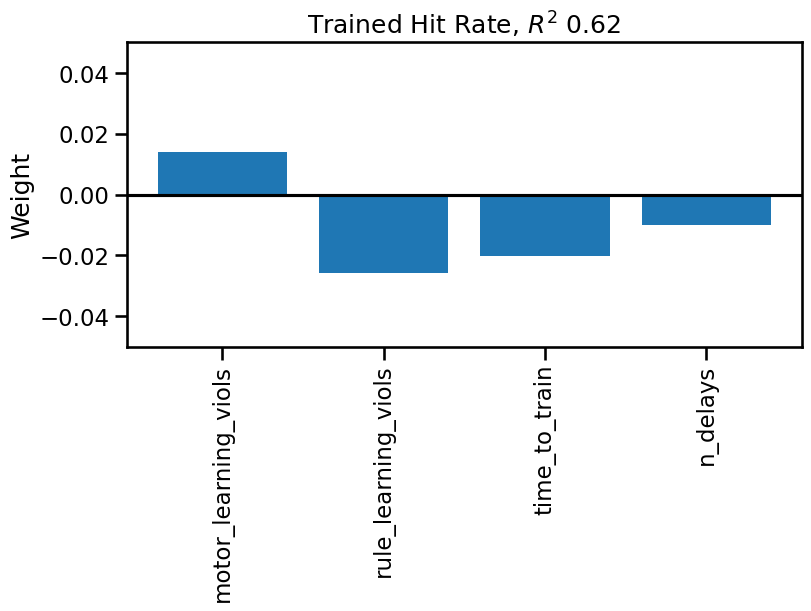

In [18]:
features = [
    "motor_learning_viols",
    "rule_learning_viols",
    "time_to_train",
    "n_delays",
]
predictor = "post_train_hit_by_session"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

> **Summary**: these results show that motor learning violations are positively correlated with trained hit rate (ie better performance), while violation rates in the rule learning phase, the number of session it took an animal to training and the number of delays between sa/sb an animal saw is negatively correlated.

I will also do a univariate linear regression on the violations dataset to show the negative correlation between the session violation rate and the session hit rate. If i had violations for all sessions, I would use the entire df for this.

In [24]:
vdf_hit_viol_by_session = (
    vdf.groupby(["animal_id", "session"])[["violation", "hit"]]
    .mean()
    .reset_index()
    .groupby("animal_id")[["violation", "hit"]]
    .mean()
    .reset_index()
)


,animal_id,violation,hit
0,W051,0.185865,0.689996
1,W060,0.191715,0.744253
2,W061,0.357772,0.659992
3,W062,0.375028,0.640597
4,W065,0.265515,0.742505
5,W066,0.423824,0.683669
6,W068,0.306225,0.663056
7,W072,0.367614,0.722516
8,W073,0.295308,0.701111
9,W074,0.232823,0.692163


In [25]:
X = vdf_hit_viol_by_session["violation"].values.reshape(-1, 1)
y = vdf_hit_viol_by_session["hit"].values.reshape(-1, 1)

X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           0.000380
Time:                        18:28:39   Log-Likelihood:                 43.210
No. Observations:                  19   AIC:                            -82.42
Df Residuals:                      17   BIC:                            -80.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7700      0.019     40.526      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.7, 0.85, '$R^2$ = 0.51')

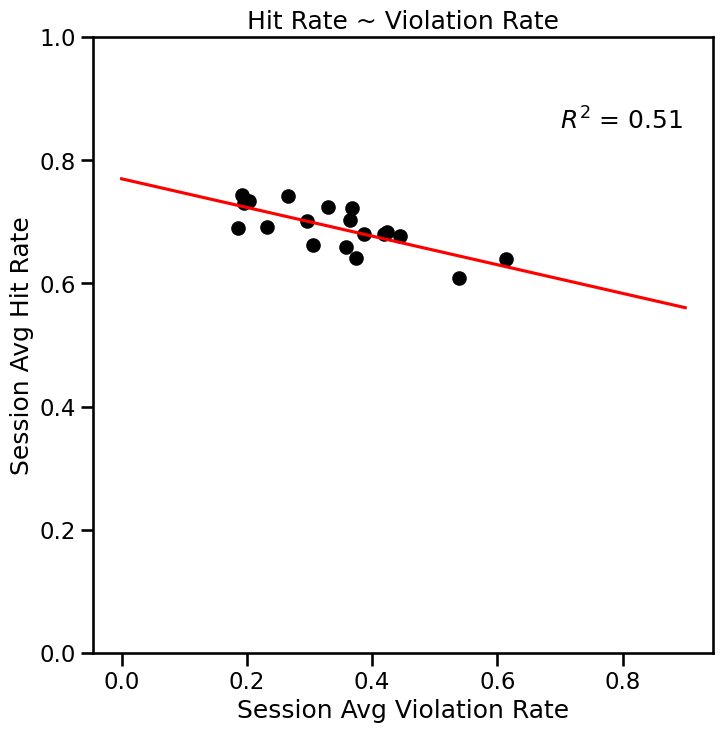

In [26]:
plt.figure(figsize=(8, 8))
slope = results.params[1]
intercept = results.params[0]

# Plot the data points
plt.scatter(
    vdf_hit_viol_by_session["violation"],
    vdf_hit_viol_by_session["hit"],
    color="black",
    label="Data",
)

# # Plot the line model
x_line = np.arange(0, 1, 0.1)

# # Calculate the corresponding y-values based on the linear regression model
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color="red", label="Regression Line")

# Add labels and title
plt.ylabel("Session Avg Hit Rate")
plt.xlabel("Session Avg Violation Rate")
plt.ylim(0, 1)
plt.title("Hit Rate ~ Violation Rate")

# # Add legend

plt.text(0.7, 0.85, f"$R^2$ = {results.rsquared_adj:.2f}")

### Prev Violation Model Comparison Multiclass

Here, I am going to load in some data for the model comparison i did with the multiclass model for using base (psytrack) regressors, prev violation binary and prev violation filtered regressors. I saw some interesting splitting between the fits and I want to see if there are any variables that explain it. This is work from the notebook `2023_09_compare_prev_viol_psytrack.ipynb`

In [56]:
f_name = "/Users/jessbreda/Desktop/github/animal-learning/data/results/compare_prev_viol_psytrack_bits_per_trial.csv"

model_comp_df = pd.read_csv(f_name)
model_comp_df.drop_duplicates(inplace=True)
data = model_comp_df.dropna()  # get rid of null values

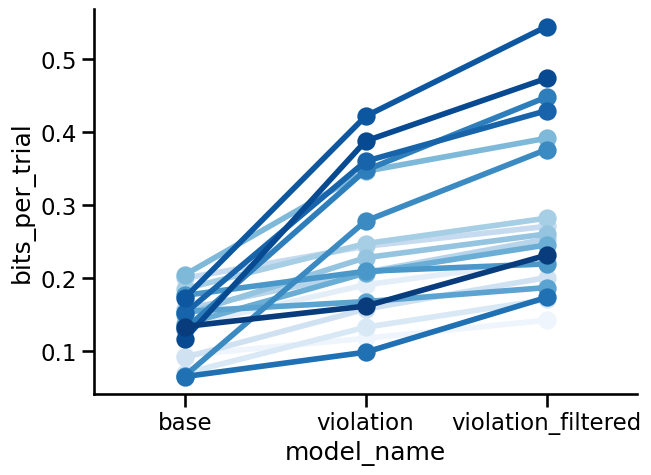

In [96]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(
    data, x="model_name", y="bits_per_trial", hue="animal_id", ax=ax, palette="Blues"
)

sns.despine()
ax.legend().set_visible(False)


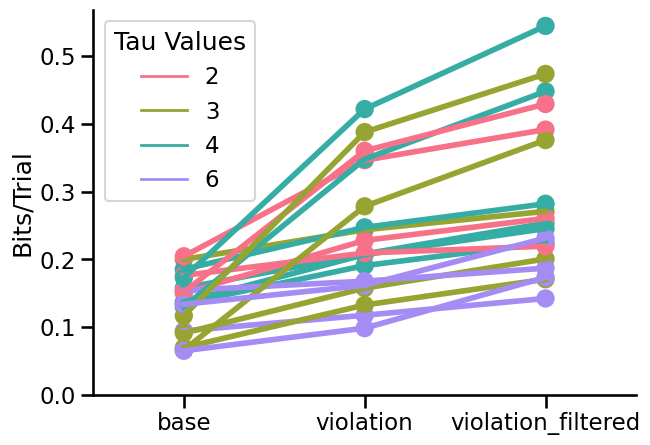

In [102]:
# Create a color palette
unique_taus = sorted(data["tau"].unique())
palette = sns.color_palette("husl", len(unique_taus))

# Create a tau to color mapping
tau_color_map = dict(zip(unique_taus, palette))
fig, ax = plt.subplots(figsize=(7, 5))

# Loop through each unique animal_id
unique_animal_ids = data["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = data[data["animal_id"] == animal_id]
    tau_value = subset_data["tau"].iloc[
        0
    ]  # Since each animal_id has one tau, just get the first one
    color = tau_color_map[tau_value]

    sns.pointplot(
        data=subset_data, x="model_name", y="bits_per_trial", color=color, ax=ax
    )

# Create a custom legend
legend_labels = [
    plt.Line2D([0], [0], color=color, lw=2) for color in tau_color_map.values()
]
ax.legend(legend_labels, unique_taus, title="Tau Values")
ax.set_ylim(0, None)

ax.set(ylabel="Bits/Trial", xlabel="")
sns.set_context("talk")
sns.despine()

In [62]:
merged_df = pd.merge(data, train_threshold_df, on="animal_id", how="left")

merged_df = pd.merge(merged_df, vdf_hit_viol_by_session, on="animal_id", how="left")

In [60]:
merged_df.head(2)

,animal_id,nll,model_name,n_test_trials,tau,log_like,bits_per_trial,n_crossings,time_to_train,post_train_hit_by_session,n_delays,motor_learning_viols,rule_learning_viols
0,W051,13860.100598,base,14534,6,-13860.100598,0.09418,6,307,0.792447,9,0.209089,0.154351
1,W051,13627.588535,violation,14534,6,-13627.588535,0.11726,6,307,0.792447,9,0.209089,0.154351


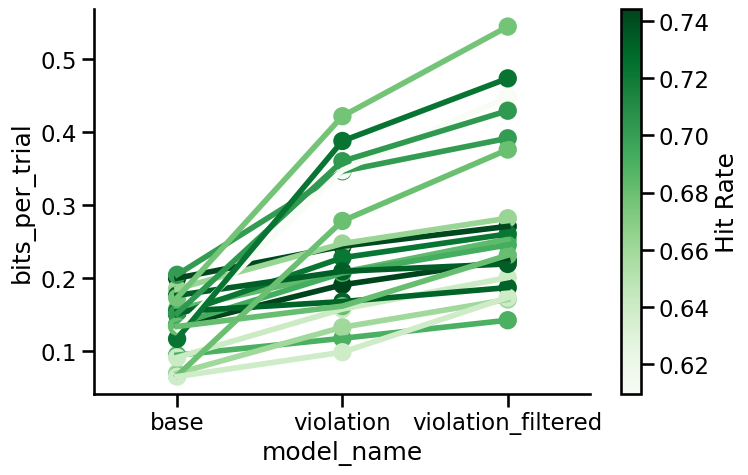

In [104]:
# Create a sequential color palette
min_performance = merged_df["hit"].min()
max_performance = merged_df["hit"].max()
norm = plt.Normalize(min_performance, max_performance)
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
ylim = (0, None)
ax.set(ylabel="Bits/Trial", xlabel="")

# Loop through each unique animal_id
unique_animal_ids = merged_df["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = merged_df[merged_df["animal_id"] == animal_id]
    performance_value = subset_data["hit"].iloc[
        0
    ]  # Assuming each animal has one performance rate
    color = sm.to_rgba(performance_value)

    sns.pointplot(
        data=subset_data, x="model_name", y="bits_per_trial", color=color, ax=ax
    )

# Add colorbar corresponding to performance_rate
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Hit Rate")

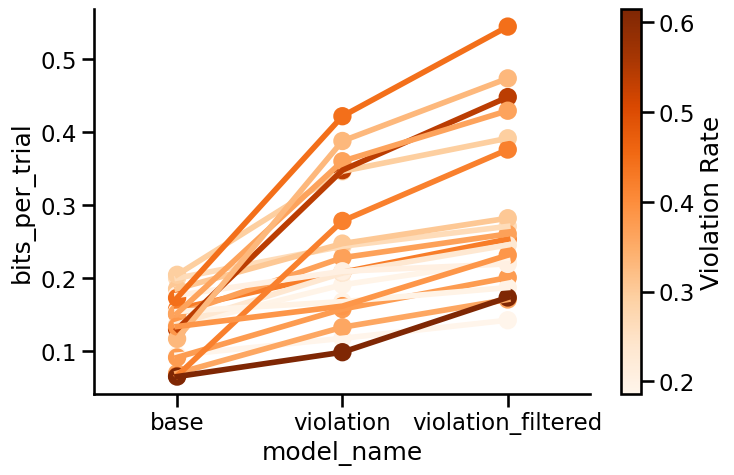

In [105]:
# Create a sequential color palette

column_name = "violation"
min_performance = merged_df[column_name].min()
max_performance = merged_df[column_name].max()
norm = plt.Normalize(min_performance, max_performance)
sm = plt.cm.ScalarMappable(cmap="Oranges", norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
ylim = (0, None)
ax.set(ylabel="Bits/Trial", xlabel="")

# Loop through each unique animal_id
unique_animal_ids = merged_df["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = merged_df[merged_df["animal_id"] == animal_id]
    performance_value = subset_data[[column_name]].iloc[
        0
    ]  # Assuming each animal has one performance rate
    color = sm.to_rgba(performance_value)

    sns.pointplot(
        data=subset_data, x="model_name", y="bits_per_trial", color=color, ax=ax
    )

# Add colorbar corresponding to performance_rate
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Violation Rate")

<Axes: xlabel='violation', ylabel='tau'>

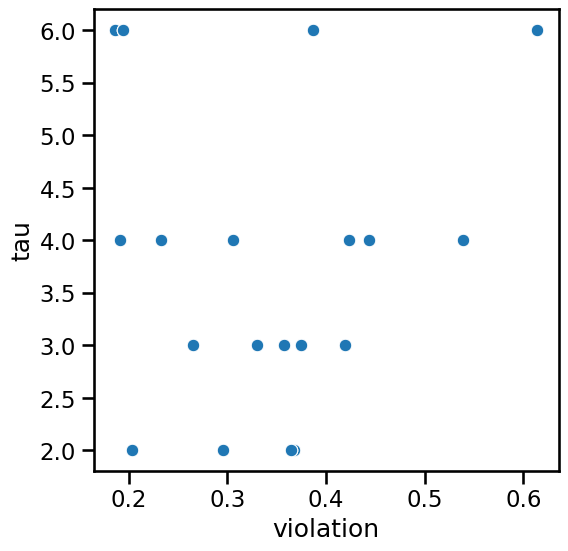

In [71]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=merged_df, x="violation", y="tau", ax=ax)

Text(0.5, 1.0, 'Time To Train vs. Tau')

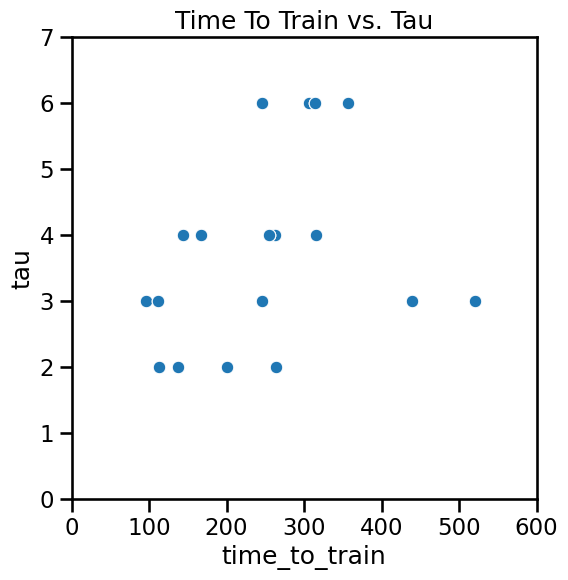

In [115]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=merged_df, x="time_to_train", y="tau", ax=ax)
plt.ylim(0, 7)
plt.xlim(0, 600)
plt.title("Time To Train vs. Tau")

Text(0.5, 1.0, 'Time To Train vs. Tau')

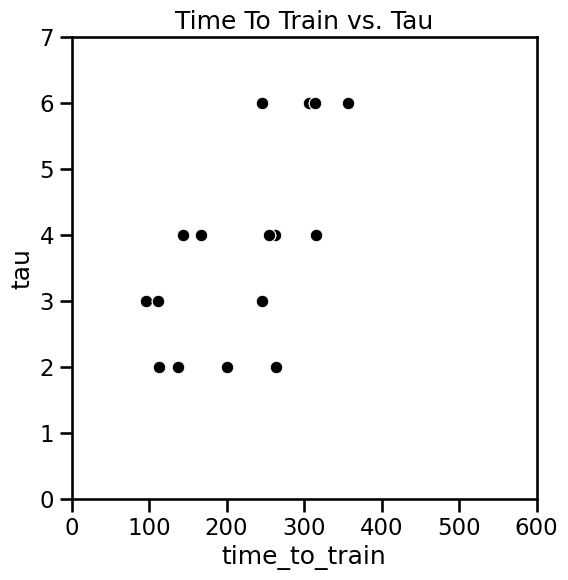

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    data=merged_df.query("time_to_train < 400"),
    x="time_to_train",
    y="tau",
    color="k",
    ax=ax,
)
plt.ylim(0, 7)
plt.xlim(0, 600)
plt.title("Time To Train vs. Tau")

**TODO: run a linear regression on time to train by tau**

Need to drop the duplicate rows for the model and just get a df with taus and time to train for each animal

In [136]:
sub_df = merged_df[["animal_id", "tau", "time_to_train"]].copy().drop_duplicates()

In [156]:
sub_df = (
    merged_df[["animal_id", "tau", "time_to_train"]]
    .query("time_to_train < 400")
    .copy()
    .drop_duplicates()
)
import statsmodels.api as sm

X = sub_df["time_to_train"].values.reshape(-1, 1)
y = sub_df["tau"].values.reshape(-1, 1)

X = np.column_stack([np.ones(X.shape[0]), X])

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     10.69
Date:                Sun, 08 Oct 2023   Prob (F-statistic):            0.00517
Time:                        19:29:11   Log-Likelihood:                -25.557
No. Observations:                  17   AIC:                             55.11
Df Residuals:                      15   BIC:                             56.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2304      0.841      1.462      0.1

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.7, 0.85, '$R^2$ = 0.38')

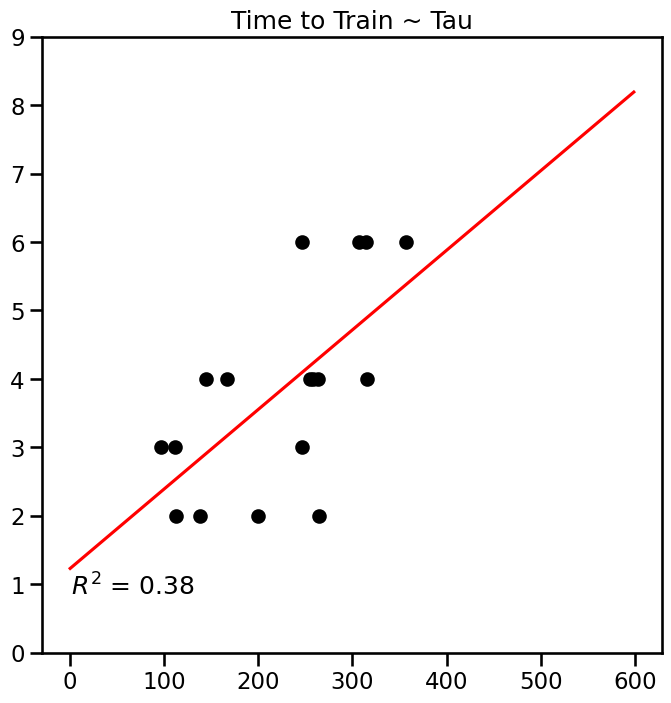

In [161]:
plt.figure(figsize=(8, 8))
slope = results.params[1]
intercept = results.params[0]

# Plot the data points
plt.scatter(
    sub_df["time_to_train"],
    sub_df["tau"],
    color="black",
    label="Data",
)

# # Plot the line model
x_line = np.arange(0, 600, 1)

# # Calculate the corresponding y-values based on the linear regression model
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color="red", label="Regression Line")

# Add labels and title
# plt.ylabel("Session Avg Hit Rate")
# plt.xlabel("Session Avg Violation Rate")
plt.ylim(0, 9)
plt.title("Time to Train ~ Tau")

# # Add legend

plt.text(0.7, 0.85, f"$R^2$ = {results.rsquared_adj:.2f}")

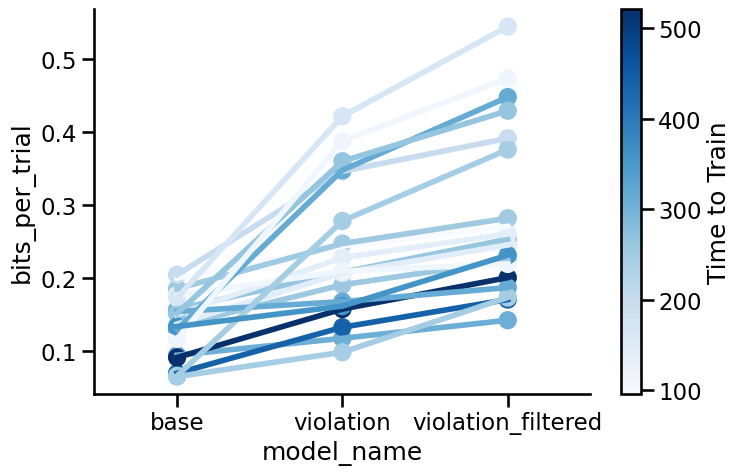

In [106]:
# Create a sequential color palette

column_name = "time_to_train"
min_performance = merged_df[column_name].min()
max_performance = merged_df[column_name].max()
norm = plt.Normalize(min_performance, max_performance)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
ylim = (0, None)
ax.set(ylabel="Bits/Trial", xlabel="")

# Loop through each unique animal_id
unique_animal_ids = merged_df["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = merged_df[merged_df["animal_id"] == animal_id]
    performance_value = subset_data[[column_name]].iloc[
        0
    ]  # Assuming each animal has one performance rate
    color = sm.to_rgba(performance_value)

    sns.pointplot(
        data=subset_data, x="model_name", y="bits_per_trial", color=color, ax=ax
    )

# Add colorbar corresponding to performance_rate
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Time to Train")

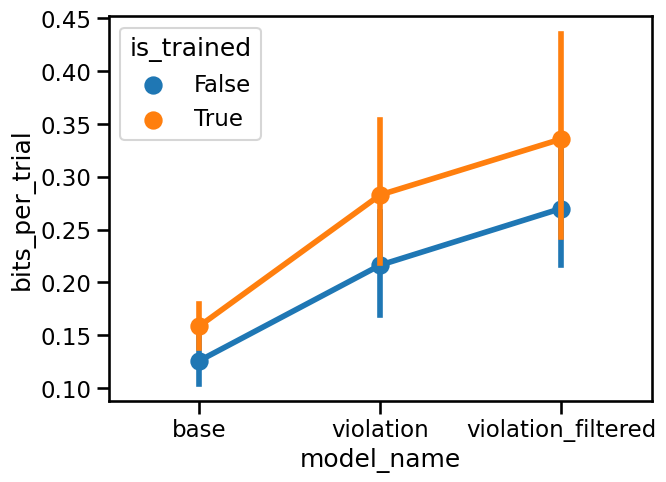

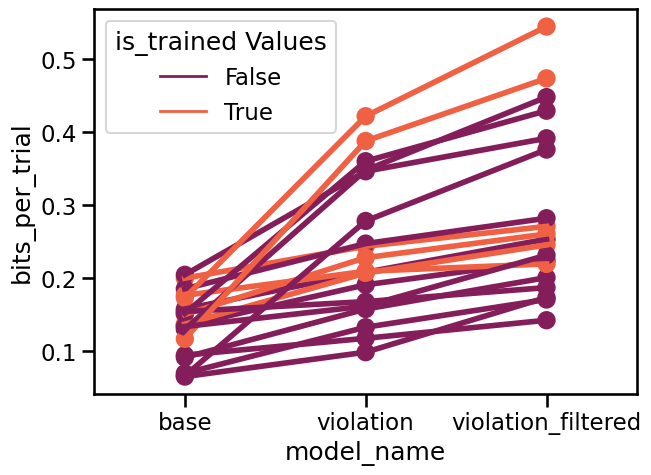

In [108]:
merged_df["is_trained"] = merged_df["time_to_train"] < 200


fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(merged_df, x="model_name", y="bits_per_trial", hue="is_trained", ax=ax)


# Create a color palette
cat_var = "is_trained"

unique_vars = sorted(merged_df[cat_var].unique())
palette = sns.color_palette("rocket", len(unique_vars))

# Create a tau to color mapping
color_map = dict(zip(unique_vars, palette))

fig, ax = plt.subplots(figsize=(7, 5))


# Loop through each unique animal_id
unique_animal_ids = merged_df["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = merged_df[merged_df["animal_id"] == animal_id]
    var_value = subset_data[cat_var].iloc[
        0
    ]  # Since each animal_id has one tau, just get the first one
    color = color_map[var_value]

    sns.pointplot(
        data=subset_data, x="model_name", y="bits_per_trial", color=color, ax=ax
    )

# # Create a custom legend
legend_labels = [
    plt.Line2D([0], [0], color=color, lw=2) for color in color_map.values()
]
ax.legend(legend_labels, unique_vars, title=f"{cat_var} Values")
# ax.set_title("Point Plot Example")

# plt.show()

In [109]:
merged_df.columns

Index(['animal_id', 'nll', 'model_name', 'n_test_trials', 'tau', 'log_like',
       'bits_per_trial', 'n_crossings', 'time_to_train',
       'post_train_hit_by_session', 'n_delays', 'motor_learning_viols',
       'rule_learning_viols', 'violation', 'hit', 'is_trained'],
      dtype='object')